In [1]:
import warnings
warnings.filterwarnings(action="ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
iris_datasets = sns.load_dataset('iris')
titanic_datasets = sns.load_dataset('titanic')
tips_datasets = sns.load_dataset('tips')
flights_datasets = sns.load_dataset('flights')

### barplot() : 카테고리 값에 따른 숫자값의 평균과 편차를 표시하는 차트
- 평균 : 막대의 높이
- 편차 : 에러바

In [32]:
titanic_datasets.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [35]:
titanic_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


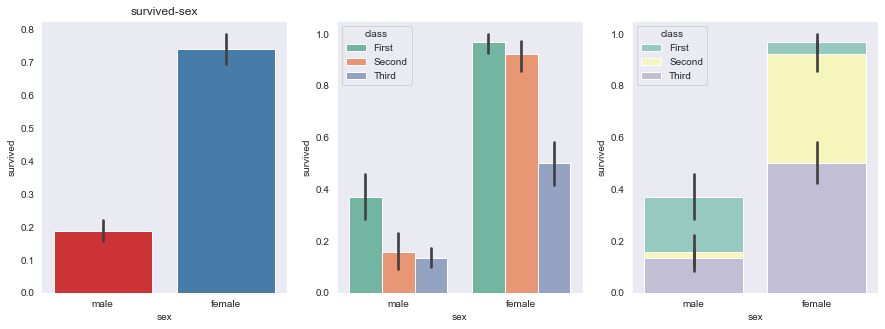

In [25]:
# 스타일 지정 : darkgrid, whitegrid, dark, white, ticks
sns.set_style('dark')

# 성별에 따른 생존률 확인
fig = plt.figure(figsize=(15, 5))

area01 = fig.add_subplot(1,3,1)
area01.set_title('survived-sex')
sns.barplot(x='sex', y='survived', data=titanic_datasets, ax=area01, palette='Set1')

# 성별과 클래스에 따른 생존률 확인 : hue = groupby
area02 = fig.add_subplot(1,3,2)
sns.barplot(x='sex', y='survived', hue='class', data=titanic_datasets, ax=area02, palette='Set2')


# 성별과 클래스에 따른 생존률 확인 : dodge = 누적
area03 = fig.add_subplot(1,3,3)
sns.barplot(x='sex', y='survived', hue='class', dodge=False , data=titanic_datasets, ax=area03, palette='Set3')

plt.show()
plt.close()

### countplot() : 카테고리 값 별로 데이터의 빈도를 표시하는 차트

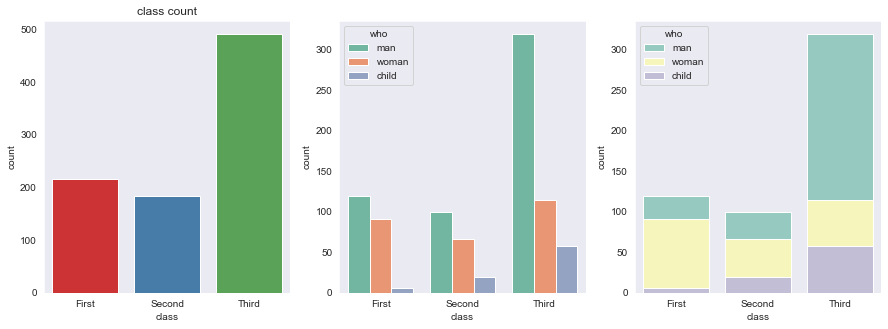

In [30]:
# 스타일 지정 : darkgrid, whitegrid, dark, white, ticks
sns.set_style('dark')

# 선실등급의 빈도 확인
fig = plt.figure(figsize=(15, 5))

area01 = fig.add_subplot(1,3,1)
area01.set_title('class count')
sns.countplot(x='class', data=titanic_datasets, ax=area01, palette='Set1')

# 선실등급의 who빈도 확인 : hue = groupby
area02 = fig.add_subplot(1,3,2)
sns.countplot(x='class', hue='who', data=titanic_datasets, ax=area02, palette='Set2')


# 선실등급의 who 누적 빈도 확인 : dodge = 누적
area03 = fig.add_subplot(1,3,3)
sns.countplot(x='class', hue='who', dodge=False , data=titanic_datasets, ax=area03, palette='Set3')

plt.show()
plt.close()

In [34]:
tips_datasets.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
tips_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


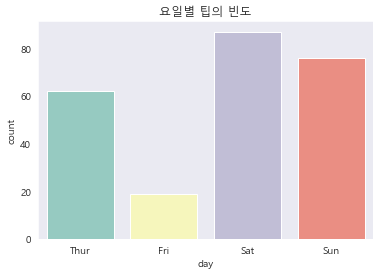

<function matplotlib.pyplot.close(fig=None)>

In [42]:
# 요일별 팁의 빈도를 시각화

fig = plt.figure()

plt.title('요일별 팁의 빈도')
sns.countplot(x='day', data=tips_datasets, palette='Set3')

plt.show()
plt.close

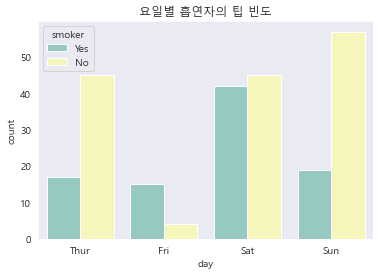

<function matplotlib.pyplot.close(fig=None)>

In [44]:
# 요일별 smoker의 팁 빈도를 시각화

fig = plt.figure()

plt.title('요일별 흡연자의 팁 빈도')
sns.countplot(x='day', hue='smoker', data=tips_datasets, palette='Set3')

plt.show()
plt.close

### regplot() : 산점도, 선형회귀분석을 위한 회귀선을 나타내는 함수
- 연속변수의 수치형

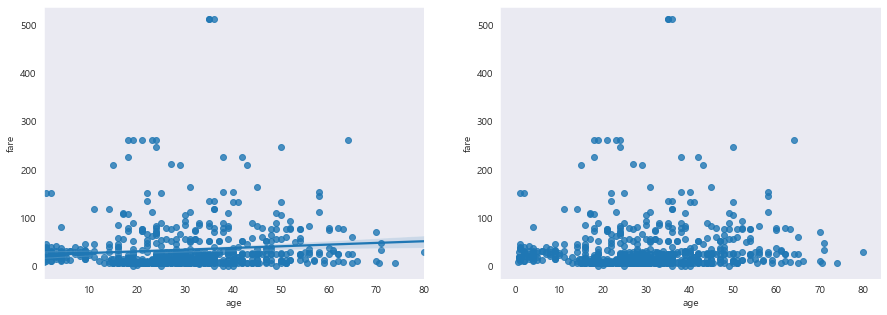

In [45]:
# 나이에 따른 요금, 회귀선 존재
fig = plt.figure(figsize=(15, 5))

area01 = fig.add_subplot(1,2,1)
sns.regplot(x='age', y='fare', data=titanic_datasets, ax=area01)

# 나이에 따른 요금, 회귀선 존재 X
area02 = fig.add_subplot(1,2,2)
sns.regplot(x='age', y='fare', data=titanic_datasets, ax=area02, fit_reg=False)

plt.show()
plt.close()

### distplot() : 히스토그램 / 커널 밀도 그래프

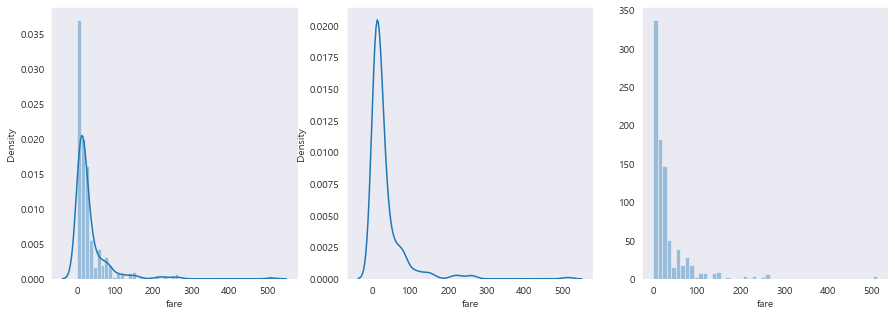

In [50]:
# 요금의 따른 밀집도 확인
fig = plt.figure(figsize=(15, 5))

area01 = fig.add_subplot(1,3,1)
sns.distplot(titanic_datasets['fare'], ax=area01)

# hist 제거
area02 = fig.add_subplot(1,3,2)
sns.distplot(titanic_datasets['fare'], hist=False, ax=area02)


# kde 제거
area03 = fig.add_subplot(1,3,3)
sns.distplot(titanic_datasets['fare'], kde=False, ax=area03)

plt.show()
plt.close()

### heatmap() : x,y의 범주형
- 매트릭스 형식으로 데이터 분류

In [51]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분
# 성별에 따른 선실등급
table = titanic_datasets.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


<AxesSubplot:xlabel='class', ylabel='sex'>

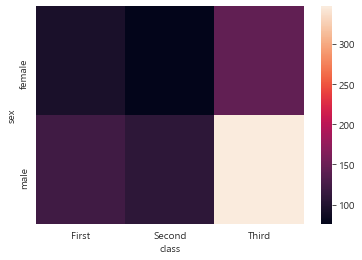

In [52]:
sns.heatmap(table)

<AxesSubplot:xlabel='class', ylabel='sex'>

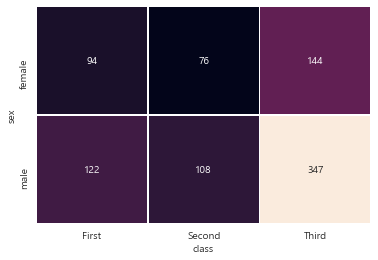

In [57]:
# color bar 제거, 수치값, 구분선
sns.heatmap(table, cbar=False, annot=True, fmt='d', linewidth=.5)

### stripplot() / swarmplot()
- 범주(category)형 데이터의 분포

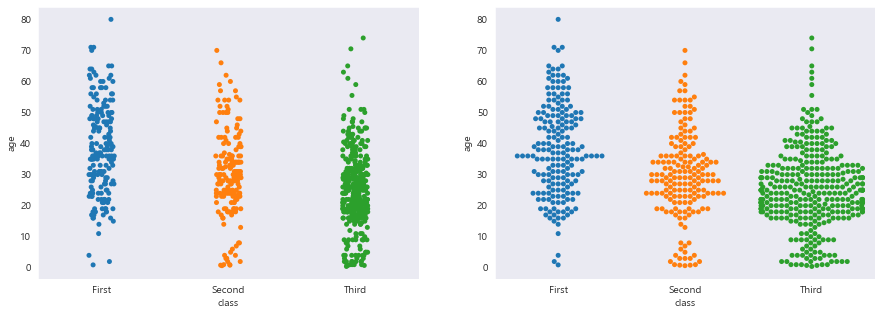

In [59]:
# 클래스의 나이에 따른 산점도
fig = plt.figure(figsize=(15, 5))

area01 = fig.add_subplot(1,2,1)
sns.stripplot(x='class', y='age', data=titanic_datasets, ax=area01)

# 클래스의 나이에 따른  분산도를 고려한 산점도
area02 = fig.add_subplot(1,2,2)
sns.swarmplot(x='class', y='age', data=titanic_datasets, ax=area02)
plt.show()
plt.close()

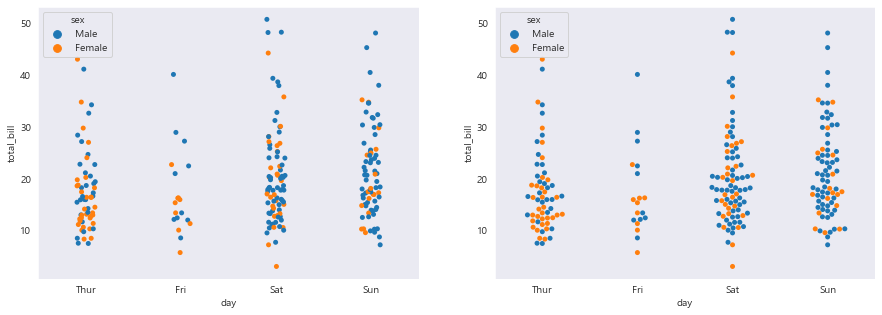

In [65]:
# tips_datasets에서 요일별, 성별 전체 팁의 시각화

fig = plt.figure(figsize=(15, 5))

# srtipplot()
area01 = fig.add_subplot(1,2,1)
sns.stripplot(x='day', y='total_bill', hue='sex', data=tips_datasets, ax=area01)

# swarmplot()
area02 = fig.add_subplot(1,2,2)
sns.swarmplot(x='day', y='total_bill', hue='sex', data=tips_datasets, ax=area02)
plt.show()
plt.close()

In [67]:
flights_datasets.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [82]:
# 승객수에 대한 heatmap
# x : year, y : month

table = flights_datasets.pivot('month','year','passengers')
table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='None-year', ylabel='month'>

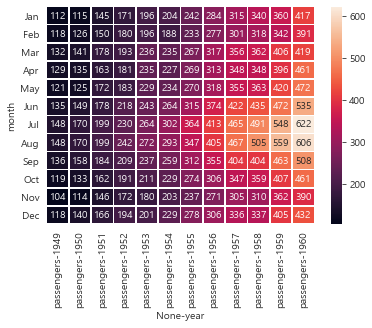

In [81]:
sns.heatmap(table, annot=True, fmt='d', linewidth=.5)

### jointplot(x, y, data, kind) : 산점도, x-y축의 각 변수에 대한 히스토그램을 동시에 표현

In [84]:
iris_datasets.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


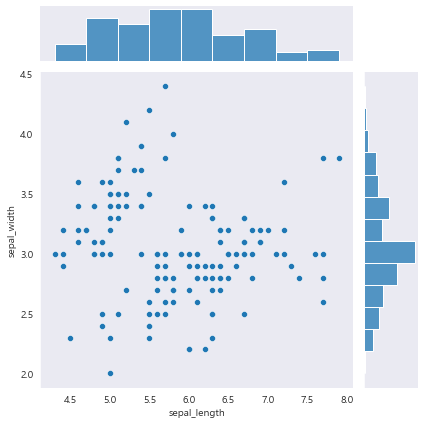

In [90]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris_datasets)

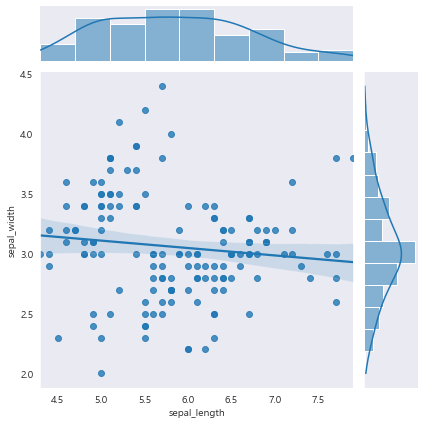

In [87]:
# 회귀선
sns.jointplot(x='sepal_length', y='sepal_width', data=iris_datasets, kind='reg')

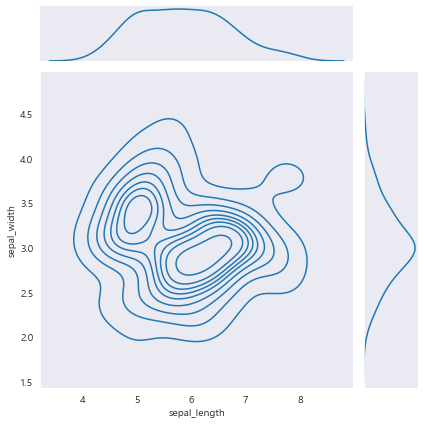

In [89]:
# 밀도
sns.jointplot(x='sepal_length', y='sepal_width', data=iris_datasets, kind='kde')

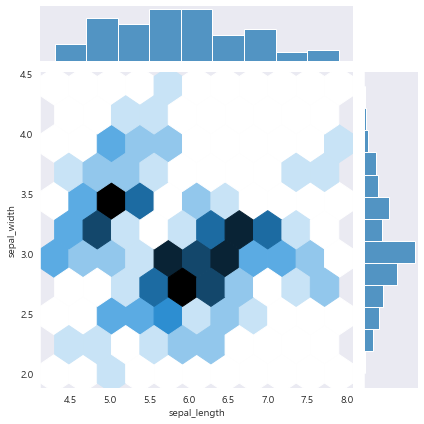

In [92]:
# 육각형
sns.jointplot(x='sepal_length', y='sepal_width', data=iris_datasets, kind='hex')